# 1. 데이터 불러오기

In [1]:
# 패키지 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# Pandas 출력 최대치 설정, 열41개, 행 20개
pd.set_option('max_columns', 41,'max_rows', 50) 

In [4]:
# Window의 기본 인코딩은 cp949 
# 상황에 맞게 수정
df = pd.read_csv('Auction_master_train.csv')

In [5]:
df.shape

(1933, 41)

# 2. 데이터 탐색

In [6]:
# 데이터의 첫 5개 값 확인
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [7]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [8]:
# 데이터의 요약 통계 확인
# 연속형 변수의 통계만 나옴
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


# 3. 결측값 처리

In [9]:
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [10]:
# addr_li, addr_bunji1, addr_bunji2, Specific, road_bunji1, road_bunji2에서 결측치 발생

In [11]:
df['addr_li'].unique()

array([nan, '모전리', '삼성리', '교리', '용수리', '대라리', '서부리', '명례리', '동부리', '매학리'],
      dtype=object)

In [12]:
# 1) addr_li
# 서울과 부산의 특성 상 '리'의 수가 적음
# 1933개의 데이터 중 1901개의 데이터에서 결측 발생
# '리'의 아파트 경매가가 '리'가 아닌 곳에 비해 상대적으로 낮을 것으로 예상

In [13]:
# 결측치를 'Not 리'로 채우고 'Not 리'인 곳과 아닌 곳의 Hammer price 차이 확인
df2 = df.copy()
df2['addr_li'].fillna(0, inplace=True)

In [14]:
df2.loc[df2['addr_li'] != 0, 'addr_li'] = 1

In [15]:
li = df2[['addr_li','Hammer_price']].groupby('addr_li').mean()
li

,Hammer_price
addr_li,
0,4.757396e+08
1,2.194524e+08


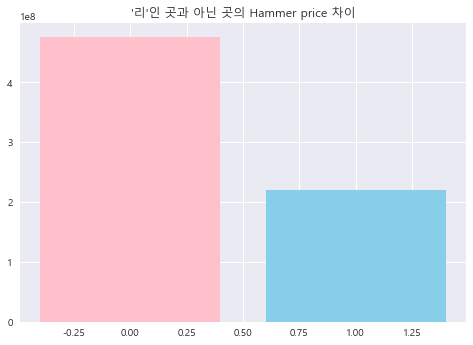

In [16]:
# 시각화
plt.bar(li.index,'Hammer_price', data=li, color =['pink','skyblue'])
plt.title("'리'인 곳과 아닌 곳의 Hammer price 차이")
plt.show()

In [17]:
# '리'가 아닌 곳의 경매가 평균이 더 높음을 알 수 있다

In [18]:
# 1) 첫번째 Feature 생성
df['리/Not리'] = df2['addr_li']

In [19]:
df['리/Not리'].unique()

array([0, 1], dtype=int64)

In [20]:
# addr_li 변수는 제거
del df['addr_li']

In [21]:
# 2) addr_bunji1, addr_bunji2
# 도로명 주소를 요즘에는 더 많이 쓴다는 점에서 번지 주소는 제거
del df['addr_bunji1']
del df['addr_bunji2']

In [22]:
# 3) road_bunji1
# 24개의 지번 주소를 직접 검색하여 결측치 처리
(df['road_bunji1'] == '0').sum()

0

In [23]:
df.loc[df['road_name'] == '0', ['road_name', 'road_bunji1']]
# 'road_bunji1'이 결측치인 경우 'road_name'이 값이 모두 '0'임을 알게 됨

,road_name,road_bunji1
29,0,NaN
84,0,NaN
122,0,NaN
224,0,NaN
239,0,NaN
311,0,NaN
370,0,NaN
464,0,NaN
491,0,NaN
496,0,NaN


In [24]:
df.loc[df['road_bunji1'].isnull(), ['addr_do', 'addr_si', 'addr_dong', 'addr_etc', 'road_name', 'road_bunji1', 'road_bunji2']]

,addr_do,addr_si,addr_dong,addr_etc,road_name,road_bunji1,road_bunji2
29,부산,동래구,낙민동,",237-2 삼주 8층 801호",0,NaN,NaN
84,부산,동래구,낙민동,",237-2 삼주 7층 701호",0,NaN,NaN
122,부산,동래구,낙민동,",237-2 삼주 6층 602호",0,NaN,NaN
224,부산,동래구,낙민동,",237-2 삼주 11층 1101호",0,NaN,NaN
239,부산,동래구,낙민동,",237-2 삼주 10층 1001호",0,NaN,NaN
311,부산,동래구,낙민동,",237-2 삼주 9층 901호",0,NaN,NaN
370,부산,동래구,낙민동,",237-2 삼주 15층 1502호",0,NaN,NaN
464,부산,동래구,낙민동,",237-2 삼주 12층 1201호",0,NaN,NaN
491,부산,동래구,낙민동,",237-2 삼주 13층 1302호",0,NaN,NaN
496,부산,동래구,낙민동,",237-2 삼주 4층 401호",0,NaN,NaN


In [25]:
df.loc[[29,84,122,224,239,311,370,464,491,496,560,613,637,656,658], 'road_name'] = '충렬대로'
df.loc[[29,84,122,224,239,311,370,464,491,496,560,613,637,656,658], 'road_bunji1'] = 71

df.loc[564, 'road_name'] = '좌동순환로433번길'
df.loc[564, 'road_bunji1'] = 30

df.loc[830, 'road_name'] = '아차산로'
df.loc[830, 'road_bunji1'] = 451

df.loc[1016, 'road_name'] = '매봉로4길'
df.loc[1016, 'road_bunji1'] = 15

df.loc[1212, 'road_name'] = '한천로'
df.loc[1212, 'road_bunji1'] = 988

df.loc[1346, 'road_name'] = '우이천로'
df.loc[1346, 'road_bunji1'] = 367

df.loc[1595, 'road_name'] = '한내로'
df.loc[1595, 'road_bunji1'] = 62

df.loc[1596, 'road_name'] = '천왕로'
df.loc[1596, 'road_bunji1'] = 29

df.loc[1632, 'road_name'] = '등촌로13다길'
df.loc[1632, 'road_bunji1'] = 29

df.loc[1832, 'road_name'] = '공원로'
df.loc[1832, 'road_bunji1'] = 27

# 24개의 지번 주소를 직접 검색하여 결측치 처리하였다

In [26]:
df['road_bunji1'].isnull().sum()

0

In [27]:
# 4) road_bunji2, Specific
# road_bunji2는 결측치가 많고 채우기 어려울 것으로 보임
# Specific 또한 특이사항에 대한 내용으로 연속형으로 변형하기 어려울 것으로 보임
# => 변수 제거
del df['road_bunji2']
del df['Specific']

In [28]:
df.isnull().sum()
# 결측치 열 모두 제거

Auction_key                    0
Auction_class                  0
Bid_class                      0
Claim_price                    0
Appraisal_company              0
Appraisal_date                 0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
First_auction_date             0
Final_auction_date             0
Final_result                   0
Creditor                       0
addr_do                        0
addr_si                        0
addr_dong                      0
addr_san                       0
addr_etc                       0
Apartment_usage                0
Preserve_regist_date           0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
road_name                      0
road_bunji

# 4. 범주형 변수 인코딩 및 변수 생성

In [29]:
# 범주형 변수 처리하기

categorical = df.select_dtypes(include='object').columns
categorical

Index(['Auction_class', 'Bid_class', 'Appraisal_company', 'Appraisal_date',
       'First_auction_date', 'Final_auction_date', 'Final_result', 'Creditor',
       'addr_do', 'addr_si', 'addr_dong', 'addr_san', 'addr_etc',
       'Apartment_usage', 'Preserve_regist_date', 'Share_auction_YorN',
       'road_name', 'Close_date', 'Close_result'],
      dtype='object')

In [30]:
# 범주형 변수 인코딩

df['Auction_class'].replace({'임의':0, '강제':1},inplace=True)
df['Bid_class'].replace({'개별':0, '일반':1, '일괄':2},inplace=True)
df['addr_san'].replace({'N':0, 'Y':1},inplace=True)
df['Apartment_usage'].replace({'주상복합':0, '아파트':1},inplace=True)
df['Share_auction_YorN'].replace({'N':0, 'Y':1},inplace=True)
df['Close_result'].replace({'    ':0, '배당':1},inplace=True)
df['addr_do'].replace({'부산':0, '서울':1},inplace=True)

In [31]:
pd.set_option('max_rows', 500) 
df['Creditor'].groupby(df.Creditor).count().reset_index(name='count').sort_values(['count'], ascending=False).head(6)
# 빈도수가 높은 6개의 Creditor를 뽑아보았다

,Creditor,count
37,Private,483
76,국민은행,119
295,우리은행,96
355,중소기업은행,95
400,하나은행,66
249,신한은행,58


In [32]:
a = df['Creditor'].groupby(df.Creditor).count().reset_index(name='count').sort_values(['count'], ascending=False).head(6)['Creditor']
a = pd.np.array(a)
a

array(['Private', '국민은행', '우리은행', '중소기업은행', '하나은행', '신한은행'], dtype=object)

In [33]:
# 주요 Creditor 5개와 Private, 그리고 그를 제외한 Creditor로 나누는 변수를 생성하기로 하였다.
def creditor_fun(x):
    if x not in a:
        return '그외'
    else:
        return x
    
df['Creditor'] = df['Creditor'].apply(creditor_fun)

In [34]:
Creditor = pd.get_dummies(df['Creditor'])
df = pd.concat([df.drop(['Creditor'], axis=1), Creditor], axis=1)

In [35]:
df['Appraisal_date'] = pd.to_datetime(df['Appraisal_date'])
df['First_auction_date'] = pd.to_datetime(df['First_auction_date'])
df['Final_auction_date'] = pd.to_datetime(df['Final_auction_date'])

# 날짜 변수를 str type에서 datetime type으로 변경

In [36]:
df['Close_date'] = pd.to_datetime(df['Close_date'], errors='coerce') 
df['Preserve_regist_date'] = pd.to_datetime(df['Preserve_regist_date'], errors='coerce') 
# errors='coerce' option을 통해 error가 나는 경우 NaN 입력

In [37]:
# feature 생성
df['경매기간'] = pd.Series(delta.days for delta in (df['Final_auction_date'] - df['First_auction_date']))
df['경매기간'].head()

0     35
1     35
2     77
3    105
4     28
Name: 경매기간, dtype: int64

In [38]:
# feature 생성
df['감정연도'] = df['Appraisal_date'].map(lambda x: x.year)
df['감정연도'].head()

0    2017
1    2016
2    2016
3    2016
4    2016
Name: 감정연도, dtype: int64

In [39]:
si = df2[['addr_si','Hammer_price']].groupby('addr_si').mean()

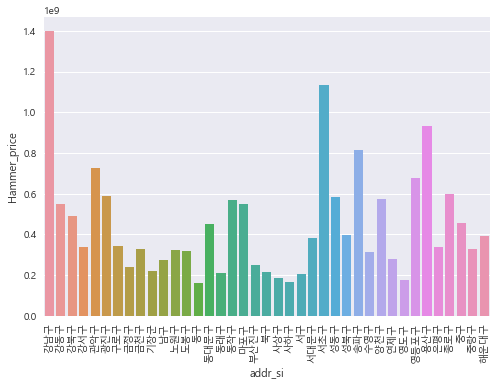

In [40]:
# 시각화
g = sns.barplot(si.index,'Hammer_price', data=si)
g.set_xticklabels(g.get_xticklabels(), rotation=90) # 연도 label이 겹쳐져 세로로 label을 볼 수 있도록 설정
plt.show()

# 시별 아파트 낙찰가의 평균이 어떻게 다른지 확인할 수 있다

In [41]:
df['층비율'] = df['Current_floor'] / df['Total_floor']

# 건물마다 모두 층이 다르므로 건물 총 층수 대비 현재 층수의 비율을 구하는 변수를 생성하였다

In [42]:
for i in range(len(df)):
    if df['Total_land_gross_area'][i] == 0:
        df['Total_land_gross_area'] = 1e-5
# 건폐율과 용적률을 계산하기에 앞서 나누는 값이 0인 경우 에러가 발생하는 것을 방지하기 위해 아주 작은 수를 대입하였다.

In [43]:
(df['Total_land_gross_area'] == 0).sum()

0

In [44]:
# 건폐율 = 건축면적 / 대지면적
# 건폐율이 클수록 대지면적에 비해 건축면적의 비율이 높다는 것이므로
# 건폐율이 클수록 건물을 넓게 지을 수 있어 그만큼 대지를 효율적으로 이용할 수 있음
# 건폐율이 낮을 수록 쾌적한 단지 환경이라고 할 수 있음
df['건폐율'] = df['Total_building_area'] / df['Total_land_gross_area']

In [45]:
# 용적률 = 연면적 / 대지면적
# 건물을 얼마나 높이, 몇 층까지 지을 수 있는지의 판단 기준
# 대지면적에 대한 건축물의 연면적 비율
# 연면적은 각 층 바닥면적의 총 합계
df['용적률'] = df['Total_building_area'] * df['Total_floor'] / df['Total_land_gross_area']

In [46]:
df.select_dtypes(include='object').columns

Index(['Appraisal_company', 'Final_result', 'addr_si', 'addr_dong', 'addr_etc',
       'road_name'],
      dtype='object')

# 5. 변수 제거

In [47]:
del df['Final_result']
# 모든 값이 '낙찰'이므로 필요없는 변수라고 판단하여 제거하였다

In [48]:
del df['Auction_key']
# key 값은 필요없다고 판단하여 제거하였다

In [49]:
del df['Appraisal_date']
del df['First_auction_date']
del df['Final_auction_date']
del df['Preserve_regist_date']
del df['Close_date']
# 앞서 이를 이용한 파생변수를 모두 생성하였으므로 날짜 변수를 제거하였다

In [50]:
del df['Appraisal_company']
del df['addr_si']
del df['addr_dong']
del df['addr_etc']
del df['road_name']
# unique한 값이 너무 많아 처리하기 힘들 것으로 판단하여 제거하였다.

In [51]:
del df['Current_floor']
del df['Total_building_area']
del df['Total_land_gross_area']
# 앞서 이를 이용한 파생변수를 모두 생성하였으므로 해당 변수들을 제거하였다

In [52]:
df.select_dtypes(include='object').columns
# 범주형 변수들을 모두 처리하였음을 알 수 있다.

Index([], dtype='object')

In [53]:
df.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_real_area,Total_land_auction_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_san,Apartment_usage,Total_floor,Share_auction_YorN,road_bunji1,Close_result,point.y,point.x,Hammer_price,리/Not리,Private,국민은행,그외,신한은행,우리은행,중소기업은행,하나은행,경매기간,감정연도,층비율,건폐율,용적률
0,0,0,1766037301,2,1,37.35,37.35,181.77,836000000,668800000,0,0,0,45,0,30.0,1,35.162717,129.137048,760000000,0,0,0,1,0,0,0,0,35,2017,0.111111,18177000.0,817965000.0
1,0,1,152946867,2,1,18.76,18.76,118.38,1073000000,858400000,0,0,1,70,0,33.0,1,35.156633,129.145068,971889999,0,0,0,1,0,0,0,0,35,2016,0.728571,11838000.0,828660000.0
2,0,0,11326510,3,2,71.00,71.00,49.94,119000000,76160000,0,0,1,15,0,88.0,1,35.184601,128.996765,93399999,0,0,1,0,0,0,0,0,77,2016,0.933333,4994000.0,74910000.0
3,0,1,183581724,2,1,32.98,32.98,84.91,288400000,230720000,0,0,1,20,0,110.0,1,35.154180,129.089081,256899000,0,0,0,1,0,0,0,0,105,2016,0.550000,8491000.0,169820000.0
4,1,1,45887671,2,1,45.18,45.18,84.96,170000000,136000000,0,0,1,7,0,51.0,1,35.099630,128.998874,158660000,0,1,0,0,0,0,0,0,28,2016,1.000000,8496000.0,59472000.0


# 5. 연속형 변수의 분포

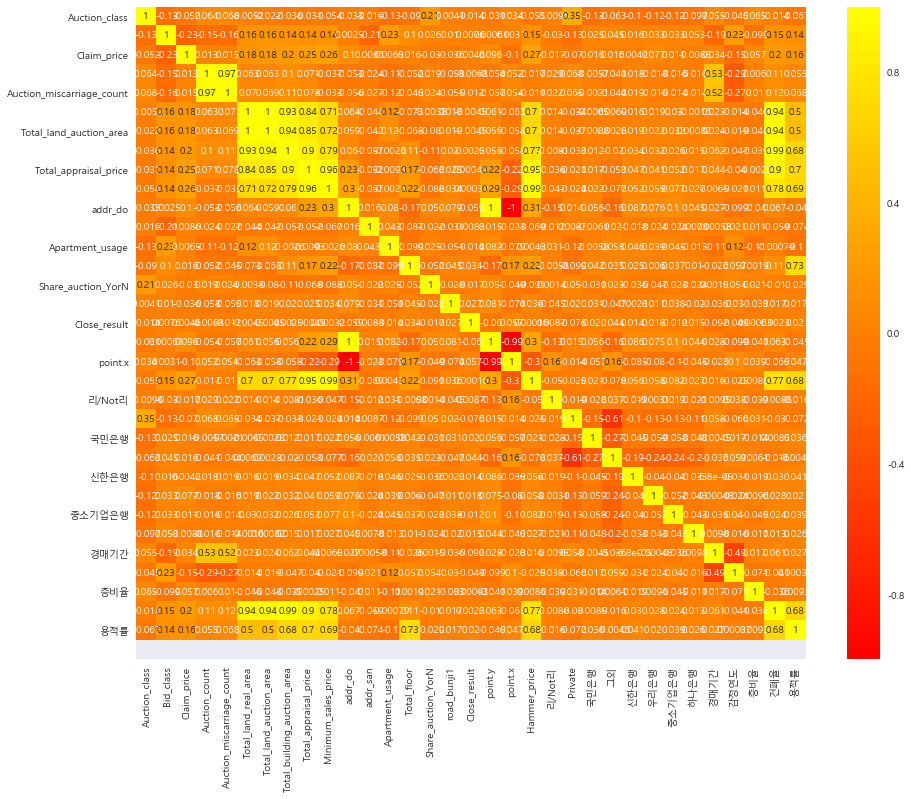

In [54]:
heat = sns.heatmap(df.corr(), annot=True, cmap='autumn')
heat.set_ylim(34, 0)
fig=plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

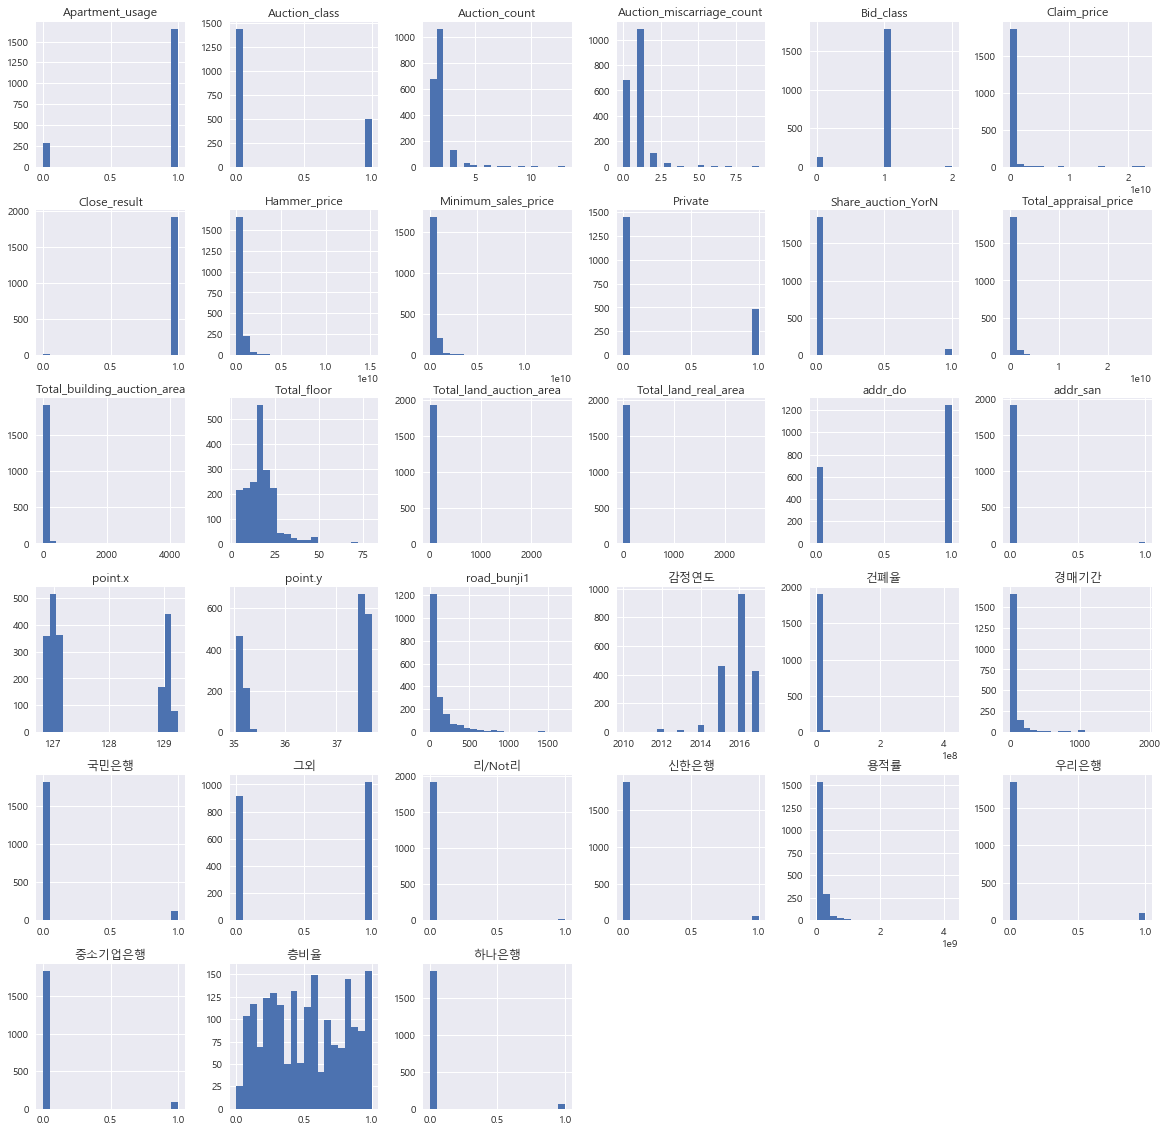

In [55]:
# 거의 모든 연속형 변수가 왼쪽에 과하게 치우친 분포임을 확인 가능
# log 변환을 하자
df.hist(bins=20, figsize=(20,20))
plt.show()

In [56]:
# 로그 변환
def log_distribution(x):
    return np.log(x)

In [57]:
# 정규분포에 가깝게 변화된 것을 확인
skew=['Claim_price',
'Auction_count',
'Auction_miscarriage_count',
'Total_land_gross_area',
'Total_land_real_area',
'Total_land_auction_area',
'Total_building_area',
'Total_building_auction_area',
'Total_appraisal_price',
'Minimum_sales_price',
'Total_floor',
'건폐율',
'용적률',
'경매기간'
]

for cols in skew:
    try :
        df[cols].apply(log_distribution)
    except:
        print(cols +' 는 범위 오버')
        
# 값에 0이 존재하는 경우는 log변환이 불가능하여 변환이 진행되지 못했다

Total_land_gross_area 는 범위 오버
Total_building_area 는 범위 오버


In [58]:
df.columns
# 최종 생성된 변수들은 다음과 같다.

Index(['Auction_class', 'Bid_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_do', 'addr_san',
       'Apartment_usage', 'Total_floor', 'Share_auction_YorN', 'road_bunji1',
       'Close_result', 'point.y', 'point.x', 'Hammer_price', '리/Not리',
       'Private', '국민은행', '그외', '신한은행', '우리은행', '중소기업은행', '하나은행', '경매기간',
       '감정연도', '층비율', '건폐율', '용적률'],
      dtype='object')

# 6. Linear Regression

In [59]:
# target과 feature를 나누기
target = df['Hammer_price']
feature = df.drop('Hammer_price', axis = 1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=1)

In [61]:
X_train.shape

(1449, 32)

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Metrics 확인
import sklearn as sk
print('R-square :' , model.score(X_train, y_train))
print('Test R-square :' , model.score(X_test, y_test))
print('MSE : ', sk.metrics.mean_squared_error(y_train, model.predict(X_train)))

R-square : 0.9917241875216973
Test R-square : 0.9862174149694031
MSE :  2769538670692632.5


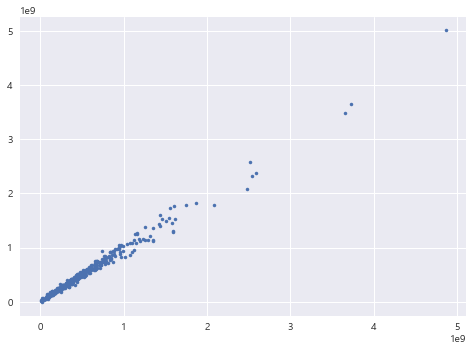

In [64]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

# 7. Check VIF

In [65]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# 우리은행
# 중소기업은행
# 하나은행
# Private
# 국민은행
# 그외
# 신한은행
# addr_do
# Total_land_auction_area
# Total_land_real_area
# Total_building_auction_area
# 건폐율
# point.y
# point.x
# Total_appraisal_price
# Minimum_sales_price
# Auction_count
# Auction_miscarriage_count
# 용적률
# 위 변수들의 vif가 10이상이므로 다중공선성이 있다고 판단된다.

,VIF Factor,features
22,2.512179e+06,그외
20,1.888324e+06,Private
21,5.820697e+05,국민은행
24,4.754528e+05,우리은행
25,4.708298e+05,중소기업은행
26,3.322406e+05,하나은행
23,2.932130e+05,신한은행
10,1.038008e+03,addr_do
6,1.001794e+03,Total_land_auction_area
5,9.840831e+02,Total_land_real_area


In [66]:
#다중공선성이 큰 변수를 제거하고 다시 해보기
df2 = df.drop(['우리은행', '중소기업은행', '하나은행', 'Private', '국민은행', '그외', '신한은행'],axis=1)
df2.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_real_area,Total_land_auction_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_san,Apartment_usage,Total_floor,Share_auction_YorN,road_bunji1,Close_result,point.y,point.x,Hammer_price,리/Not리,경매기간,감정연도,층비율,건폐율,용적률
0,0,0,1766037301,2,1,37.35,37.35,181.77,836000000,668800000,0,0,0,45,0,30.0,1,35.162717,129.137048,760000000,0,35,2017,0.111111,18177000.0,817965000.0
1,0,1,152946867,2,1,18.76,18.76,118.38,1073000000,858400000,0,0,1,70,0,33.0,1,35.156633,129.145068,971889999,0,35,2016,0.728571,11838000.0,828660000.0
2,0,0,11326510,3,2,71.00,71.00,49.94,119000000,76160000,0,0,1,15,0,88.0,1,35.184601,128.996765,93399999,0,77,2016,0.933333,4994000.0,74910000.0
3,0,1,183581724,2,1,32.98,32.98,84.91,288400000,230720000,0,0,1,20,0,110.0,1,35.154180,129.089081,256899000,0,105,2016,0.550000,8491000.0,169820000.0
4,1,1,45887671,2,1,45.18,45.18,84.96,170000000,136000000,0,0,1,7,0,51.0,1,35.099630,128.998874,158660000,0,28,2016,1.000000,8496000.0,59472000.0


In [67]:
df2_x = df2.drop(['Hammer_price'], axis=1)
df2_y = pd.DataFrame(df2['Hammer_price'],columns=['Hammer_price'])

In [68]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(df2_x, df2_y, random_state=0)

In [69]:
#모델 불러옴
model2 = LinearRegression()
#train data에 fit시킴
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Metrics 확인
import sklearn as sk
print('R-square :' , model2.score(X_train2, y_train2))
print('Test R-square :' , model2.score(X_test2, y_test2))
print('MSE : ', sk.metrics.mean_squared_error(y_train2, model2.predict(X_train2)))

# 전의 모델보다 성능이 낮아졌다.

R-square : 0.9914074939005215
Test R-square : 0.9847547809368751
MSE :  3206926585621102.5


# 8. Ridge Regression

In [71]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1.0) # alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
# Metrics 확인
import sklearn as sk
print('R-square :' , ridge.score(X_train, y_train))
print('Test R-square :' , ridge.score(X_test, y_test))
print('MSE : ', sk.metrics.mean_squared_error(y_train, ridge.predict(X_train)))

# 정규화 하지 않은 것보다 성능이 더 낮아졌다.

R-square : 0.9916743884566889
Test R-square : 0.9862084232163619
MSE :  2786204156609190.5


# 9. Final Model

## 행렬을 통해 Beta 값 추출하기

In [74]:
import numpy as np
from numpy.linalg import inv 

def estimate_beta(x, y):
    a = np.dot(x.T, x)
    b = np.dot(x.T, y)
    beta_hat = np.dot(inv(a), b)
    return beta_hat

In [76]:
X_train.values, y_train.values

(array([[0.00000000e+00, 1.00000000e+00, 3.06659220e+07, ...,
         8.33333333e-01, 6.29700000e+06, 3.77820000e+07],
        [0.00000000e+00, 1.00000000e+00, 4.20000000e+08, ...,
         4.00000000e-01, 7.45400000e+06, 3.72700000e+07],
        [0.00000000e+00, 1.00000000e+00, 4.00000000e+08, ...,
         3.68421053e-01, 8.49700000e+06, 1.61443000e+08],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00025900e+08, ...,
         1.00000000e+00, 1.01390000e+07, 1.82502000e+08],
        [0.00000000e+00, 1.00000000e+00, 1.69872362e+08, ...,
         3.07692308e-01, 1.02380000e+07, 1.33094000e+08],
        [0.00000000e+00, 1.00000000e+00, 6.81116472e+08, ...,
         3.88888889e-01, 1.14880000e+07, 2.06784000e+08]]),
 array([  73899900,  803777000, 1075385900, ..., 1419100000,  160119000,
         789999999], dtype=int64))

In [85]:
beta = estimate_beta(X_train.values, y_train.values)
beta

array([ 4.12020821e+06,  2.00094439e+07,  4.38560868e-03, -1.75735272e+07,
        3.18254136e+07,  1.38201609e+06, -1.59662646e+06,  4.62247973e+05,
        5.43512263e-02,  1.04544779e+00,  3.56315778e+08, -9.94112358e+06,
        1.73714996e+07, -2.80453657e+05, -2.70830319e+07,  1.15128902e+04,
        6.96615218e+06, -9.86430581e+07,  5.18981934e+07,  5.79711375e+06,
        1.82486744e+09,  1.82202808e+09,  1.82666549e+09,  1.83214311e+09,
        1.82073608e+09,  1.84041862e+09,  1.82806777e+09, -1.82891589e+02,
       -2.51204222e+06, -4.59354174e+06, -6.44901434e+00,  4.04901108e-02])

In [79]:
model.coef_ #추정된 회귀계수(intercept제외)
# 위에서 추출한 회귀계수(Beta)값과 동일한 것을 확인할 수 있다.

array([ 4.12020825e+06,  2.00094376e+07,  4.38560770e-03, -1.75735251e+07,
        3.18254108e+07,  1.38201708e+06, -1.59662745e+06,  4.62248424e+05,
        5.43512303e-02,  1.04544778e+00,  3.56315778e+08, -9.94112374e+06,
        1.73714996e+07, -2.80453675e+05, -2.70830333e+07,  1.15128896e+04,
        6.96615234e+06, -9.86430579e+07,  5.18981931e+07,  5.79711412e+06,
       -2.97921794e+06, -5.81857148e+06, -1.18116788e+06,  4.29645425e+06,
       -7.11057566e+06,  1.25719622e+07,  2.21116499e+05, -1.82880999e+02,
       -2.51203955e+06, -4.59354199e+06, -6.44901871e+00,  4.04901033e-02])

## 행렬을 통해 MSE 값 추출하기

In [91]:
def estimate_MSE(x, y):
    beta = estimate_beta(x, y)
    yhat = x.dot(beta)
    return ((y - yhat)**2).mean(axis=None)

In [92]:
estimate_MSE(X_train, y_train)

2769538670692615.5

In [81]:
sk.metrics.mean_squared_error(y_train, model.predict(X_train))
# 위에서 계산한 MSE 값과 동일한 것을 확인할 수 있다.

2769538670692632.5